# Optimisation des tournées d'entretien des arbres à Paris

Notebook Google colab dispo ici pour une meilleure visibilité des graphiques: https://colab.research.google.com/drive/1-v0uh3Hslw9nT7E2Xkc7NovCzJufZhF4?usp=sharing

**L'objectif**: Réaliser une analyse exploratoire avec un jeu de données portant sur les arbres de la ville de Paris, dans le cadre du programme “Végétalisons la ville”.

**Résultat attendu:** Optimisation des tournées pour l’entretien des arbres de la ville


---

## Étape 1 > Importation des librairies et analyse des données
1. Importation de la librairie  pandas permettant l'analyse exploratoire et de la librairie matplotlib et folium pour la réalisation de graphiques.
2. Importation du fichier de données pour future analyse


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Librairie graphique
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from IPython.display import display

# Importe le dataframe dans la variable trees pour future utilisation
arbres = pd.read_csv('https://raw.githubusercontent.com/6be709c0/oc-ai-engineer/main/P2/input/p2-arbres-fr.csv', sep = ';',)

3. Visualisation d'un échantillon du jeu de données

In [ ]:
# Affiche les 5 premiers résultat
arbres.head()

id type_emplacement domanialite   arrondissement complement_addresse  \
0  99874            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
1  99875            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
2  99876            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
3  99877            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
4  99878            Arbre      Jardin  PARIS 17E ARRDT                 NaN   

   numero                                        lieu id_emplacement  \
0     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             19   
1     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             20   
2     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             21   
3     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             22   
4     NaN  PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0037   

  libelle_francais      genre         espece variete  circonference_cm  \
0       Marronnier   Aesculus  hippocastanum     NaN                20   
1               If      Taxus        baccata     NaN                65   
2               If      Taxus        baccata     NaN                90   
3           Erable       Acer        negundo     NaN                60   
4     Arbre à miel  Tetradium      daniellii     NaN                38   

   hauteur_m stade_developpement  remarquable  geo_point_2d_a  geo_point_2d_b  
0          5                 NaN          0.0       48.857620        2.320962  
1          8                   A          NaN       48.857656        2.321031  
2         10                   A          NaN       48.857705        2.321061  
3          8                   A          NaN       48.857722        2.321006  
4          0                 NaN          NaN       48.890435        2.315289

4. Description de jeu de données

In [ ]:
print(f"Le jeu de données comprend {len(arbres)} lignes & {len(arbres.columns)} colonnes.")
print("Type des données par colonne:")
arbres.dtypes.to_frame(name='Type')

Le jeu de données comprend 200137 lignes & 18 colonnes.
Type des données par colonne:


Type
id                     int64
type_emplacement      object
domanialite           object
arrondissement        object
complement_addresse   object
numero               float64
lieu                  object
id_emplacement        object
libelle_francais      object
genre                 object
espece                object
variete               object
circonference_cm       int64
hauteur_m              int64
stade_developpement   object
remarquable          float64
geo_point_2d_a       float64
geo_point_2d_b       float64

5. Analyse des valeurs de différentes colonnes

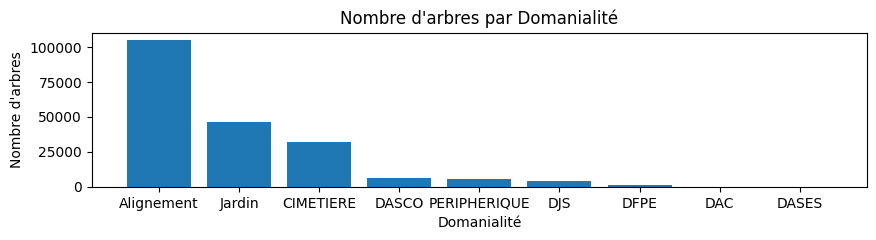

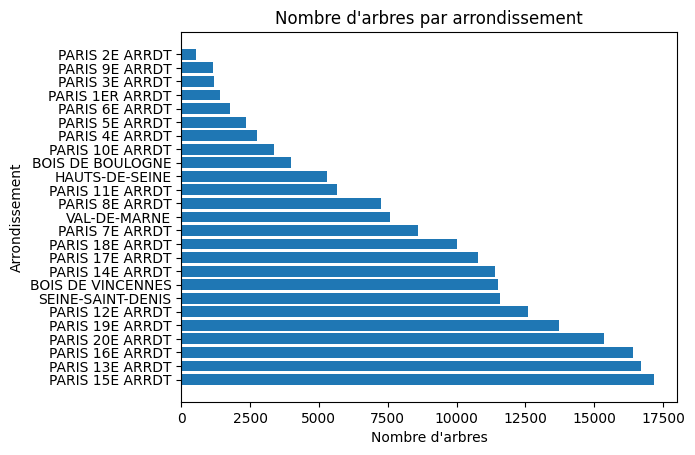

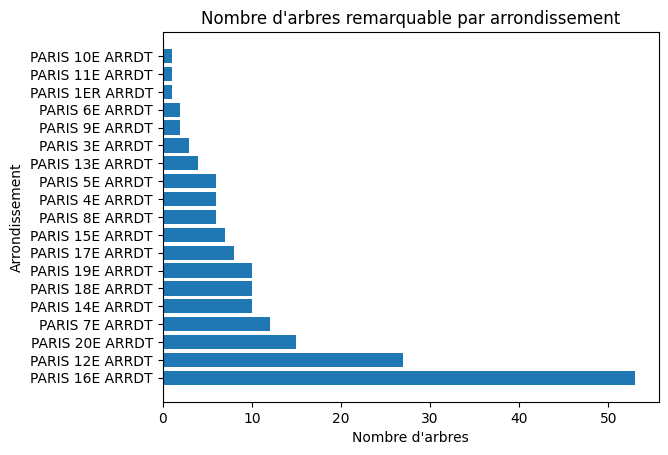


- Nombre de libellé francais unique = 192
- Nombre d'espèce unique = 539
- Nombre de variété unique = 436
- Nombre de genre d'arbres unique = 175
- Nombre de type d'emplacement unique = 1
- Nombre d'arbres remarquable = 184


In [ ]:
###### Pour domanialite ######
type_valeurs = arbres['domanialite'].value_counts().reset_index() # Calculer les valeurs dans la colonne 'domanialite' et réinitialiser l'index
type_valeurs.columns = ['domanialite', 'nombre'] # Renommer les colonnes du DataFrame
plt.figure(figsize=(10, 2)) # Créer une nouvelle figure avec une taille personnalisée (largeur, hauteur)

# Créer un diagramme à barres avec les valeurs de 'domanialité' en tant que valeurs sur l'axe x
# et les valeurs de 'nombre' en tant que hauteurs des barres
plt.bar(type_valeurs['domanialite'], type_valeurs['nombre'])

plt.xlabel('Domanialité') # Ajouter un text à l'axe des abscisses (axe x)
plt.ylabel('Nombre d\'arbres') # Ajouter un text à l'axe des ordonnées (axe y)
plt.title('Nombre d\'arbres par Domanialité') # Ajouter un titre au graphique

plt.show() # Afficher le graphique
print("")

###### Pour l'arrondissement ######
type_valeurs = arbres['arrondissement'].value_counts().reset_index() # Calculer les valeurs dans la colonne 'arrondissement' et réinitialiser l'index
type_valeurs.columns = ['arrondissement', 'nombre'] # Renommer les colonnes du DataFrame

# Créer un diagramme à barres avec les valeurs de 'arrondissement' en tant que valeurs sur l'axe y
# et les valeurs de 'nombre' en tant que largeur des barres
plt.barh(type_valeurs['arrondissement'], type_valeurs['nombre'])

plt.ylabel('Arrondissement') # Ajouter un text à l'axe des abscisses (axe x)
plt.xlabel('Nombre d\'arbres') # Ajouter un text à l'axe des ordonnées (axe y)
plt.title('Nombre d\'arbres par arrondissement') # Ajouter un titre au graphique

plt.show() # Afficher le graphique
print("")

###### Pour l'arbre remarquable ######
type_valeurs =  arbres[arbres["remarquable"] == 1.0]['arrondissement'].value_counts().reset_index() # Calculer les valeurs dans la colonne 'domanialite' et réinitialiser l'index
type_valeurs.columns = ['arrondissement', 'nombre'] # Renommer les colonnes du DataFrame

# Créer un diagramme à barres avec les valeurs de 'arrondissement' en tant que valeurs sur l'axe y
# et les valeurs de 'nombre' en tant que largeur des barres
plt.barh(type_valeurs['arrondissement'], type_valeurs['nombre'])

plt.ylabel('Arrondissement') # Ajouter un text à l'axe des abscisses (axe x)
plt.xlabel('Nombre d\'arbres') # Ajouter un text à l'axe des ordonnées (axe y)
plt.title('Nombre d\'arbres remarquable par arrondissement') # Ajouter un titre au graphique

plt.show() # Afficher le graphique


###### Affiche le nombre de valeurs unique
print("")
print(f'- Nombre de libellé francais unique = {len(arbres["libelle_francais"].value_counts())}') # Affiche le nombre de libellé francais unique
print(f'- Nombre d\'espèce unique = {len(arbres["espece"].value_counts())}') # Affiche le nombre d'espèce unique
print(f'- Nombre de variété unique = {len(arbres["variete"].value_counts())}') # Affiche le nombre de varieté unique
print(f'- Nombre de genre d\'arbres unique = {len(arbres["genre"].value_counts())}') # Affiche le nombre de genre d'arbres unique
print(f'- Nombre de type d\'emplacement unique = {len(arbres["type_emplacement"].value_counts())}') # Affiche le nombre de type d'emplacement unique
print(f'- Nombre d\'arbres remarquable = {len(arbres[arbres["remarquable"] == 1])}') # Affiche le nombre d'arbres remarquables



6. Taux de valeurs manquantes par colonnes en pourcentage et nombre manquant

In [ ]:
# Créer un DataFrame pour stocker les résultats
dataframe = pd.DataFrame(columns=['Colonne', 'Pourcentage Manquant', 'Nombre Manquant'])

# Calculer le pourcentage de valeurs manquantes
pourcentage_manquant = (arbres.isna().mean() * 100).round(2)
pourcentage_formate = pourcentage_manquant.apply(lambda x: f"{x}%")

# Créer un DataFrame avec les informations souhaitées
dataframe = pd.DataFrame({
    'Pourcentage': pourcentage_formate.values,
    'Nombre': arbres.isna().sum().astype(int)
})

dataframe = dataframe.sort_values(by='Nombre', ascending=False)

print("Valeur manquante par colonnes:")
dataframe

Valeur manquante par colonnes:


Pourcentage  Nombre
numero                   100.0%  200137
complement_addresse      84.56%  169235
variete                  81.62%  163360
stade_developpement      33.58%   67205
remarquable              31.53%   63098
espece                    0.88%    1752
libelle_francais          0.75%    1497
genre                     0.01%      16
domanialite                0.0%       1
circonference_cm           0.0%       0
geo_point_2d_a             0.0%       0
hauteur_m                  0.0%       0
id                         0.0%       0
type_emplacement           0.0%       0
id_emplacement             0.0%       0
lieu                       0.0%       0
arrondissement             0.0%       0
geo_point_2d_b             0.0%       0

## Étape 2 > Nettoyage du jeu de données



- J'ai remarqué que le type de chaque colonne est cohérent

- Les colonnes suivantes sont utiles à nettoyer pour le jeu de données

| Colonne               | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| ID           | Identifiant                                                        |
| arrondissement           | Emplacement                                                        |
| domanialite           | Catégorie d'emplacement                                                   |
| remarquable           | Soins particuliers                                                        |
| stade_developpement   | Fréquence d'entretien de l'arbre en fonction de son âge                     |
| circonference_cm      | Largeur à entretenir                                                       |
| hauteur_m             | Hauteur à entretenir                                                       |
| geo_point_2d_a        | Localisation GPS (latitude)                                                |
| geo_point_2d_b        | Localisation GPS (longitude)

### 2.0 ID

On vérifie s'il y a un ID null ou en doublon


In [ ]:
nb_arbres_id_doublon = arbres.loc[arbres[['id']].duplicated(keep=False)] # Check le nombre de doublons ID

print(f'Il y a {len(arbres[arbres["id"].isna()])} ID non défni')
print(f'Nombre de doublons par ID = {len(nb_arbres_id_doublon)}')


Il y a 0 ID non défni
Nombre de doublons par ID = 0


### 2.1 Domanialité

In [ ]:
arbres[arbres["domanialite"].isna()] # Affichage des domanialités null

id type_emplacement domanialite   arrondissement  \
197239  2020911            Arbre         NaN  PARIS 20E ARRDT   

       complement_addresse  numero  \
197239                 NaN     NaN   

                                                     lieu id_emplacement  \
197239  JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...         203006   

       libelle_francais         genre   espece variete  circonference_cm  \
197239      Chimonanthe  Chimonanthus  praecox     NaN                35   

        hauteur_m stade_developpement  remarquable  geo_point_2d_a  \
197239          4                  JA          0.0       48.849547   

        geo_point_2d_b  
197239         2.41419

Étant donné que la domanialité null est unique et que la colonne lieu de celle-ci indique jardins d'immeuble, on modifie la domanialité de celle-ci par jardin.

In [ ]:
index_domanialite_null = arbres.loc[arbres["domanialite"].isna()].index.values # Selectionne les index

print(f'Index à changer: {index_domanialite_null}')
print(f'Valeur domanialite avant changement = {arbres.loc[index_domanialite_null, "domanialite"].tolist()}')
arbres.loc[arbres["domanialite"].isna(), "domanialite"] = "Jardin"
print(f'Valeur domanialite après changement = {arbres.loc[index_domanialite_null, "domanialite"].tolist()}')

Index à changer: [197239]
Valeur domanialite avant changement = [nan]
Valeur domanialite après changement = ['Jardin']


### 2.2 Arrondissement

On vérifie si il y a un arrondissement null

In [ ]:
print(f'Il y a {len(arbres[arbres["arrondissement"].isna()])} arrondissements non défni')

Il y a 0 arrondissements non défni


### 2.3 Arbres remarquables

Chaque arbre remarquable non défini (valeur null) sera défini comme non remarquable (0.0)

In [ ]:
print(f'Nombre d\'arbres remarquables non défini avant changement = {len(arbres[arbres["remarquable"].isna()])}')
arbres.loc[arbres["remarquable"].isna(), "remarquable"] = 0.0
print(f'Nombre d\'arbres remarquables non défini après changement = {len(arbres[arbres["remarquable"].isna()])}')


Nombre d'arbres remarquables non défini avant changement = 63098
Nombre d'arbres remarquables non défini après changement = 0


### 2.4 Stade de développement

Paris indique qu'un arbre jeune (0-3 ans) à besoin de plus d'attention qu'un arbre adulte (> 3 ans).

Dans le jeu de données, on a plusieurs stade:

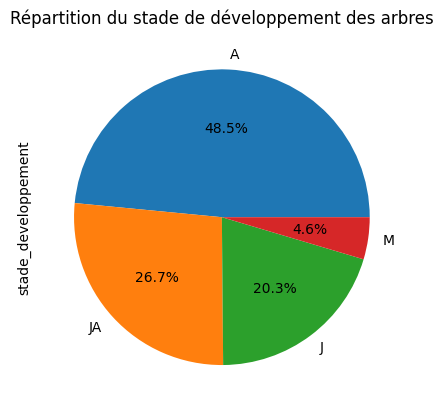

In [ ]:
# Camembert de la répartition du stade de développement des arbres
camembert_chart = arbres["stade_developpement"].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.title("Répartition du stade de développement des arbres") # Ajouter un titre
plt.show() # Afficher le diagramme

A = Adulte
M = Mature
JA = Jeune Adulte
J = Jeune

Dans notre cas, on a besoin de savoir seulement si l'arbre est adulte ou jeune.

On modifie donc Mature pour être adulte et jeune adulte pour être défini comme jeune.

Tous les arbres qui ne sont pas définis seront considéré comme jeune pour s'assurer qu'une modification reflète la réalité lors du prochain passage d'un entretien.

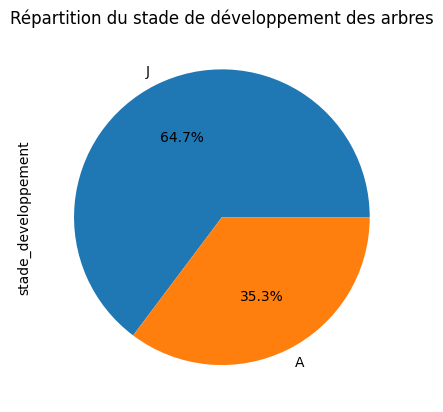

In [ ]:
arbres.loc[arbres["stade_developpement"].isna(), "stade_developpement"] = "J" # Null devient J
arbres.loc[arbres["stade_developpement"] == "JA", "stade_developpement"] = "J" # JA devient J
arbres.loc[arbres["stade_developpement"] == "M", "stade_developpement"] = "A" # M devient A

pie_chart = arbres["stade_developpement"].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.title("Répartition du stade de développement des arbres") # Ajouter un titre
plt.show() # Afficher le diagramme

### 2.5 Suppression des doublons

On vérifie si il y a des doublons d'ID et des doublons par position GPS.
Dans le cas de doublons GPS, on ne peut pas s'assurer que ça soit incorrect.
On les relèves pour voir.

In [ ]:
nb_arbres_gps_doublon = arbres.loc[arbres[['geo_point_2d_a','geo_point_2d_b']].duplicated(keep=False)] # Check le nombre de doublon via position GPS

print(f'Nombre de doublons par position GPS = {len(nb_arbres_gps_doublon)}')

arbres.loc[arbres[['geo_point_2d_a','geo_point_2d_b']].duplicated(keep=False)].head() # Affiche un échantillon des doublons GPS

Nombre de doublons par position GPS = 22


id type_emplacement domanialite   arrondissement  \
10099  112286            Arbre      Jardin  PARIS 12E ARRDT   
10100  112287            Arbre      Jardin  PARIS 12E ARRDT   
12794  115338            Arbre      Jardin  PARIS 19E ARRDT   
12795  115339            Arbre      Jardin  PARIS 19E ARRDT   
12796  115340            Arbre      Jardin  PARIS 19E ARRDT   

      complement_addresse  numero                    lieu id_emplacement  \
10099                 NaN     NaN  JARDIN PARTAGE BEL-AIR              5   
10100                 NaN     NaN  JARDIN PARTAGE BEL-AIR              6   
12794                 NaN     NaN               VOIE DF19              1   
12795                 NaN     NaN               VOIE DF19              2   
12796                 NaN     NaN               VOIE DF19              3   

      libelle_francais      genre     espece variete  circonference_cm  \
10099          Ailante  Ailanthus  altissima     NaN                 0   
10100          Ailante  Ailanthus  altissima     NaN                 0   
12794         Peuplier    Populus      nigra     NaN               120   
12795         Peuplier    Populus      nigra     NaN               100   
12796         Peuplier    Populus      nigra     NaN               165   

       hauteur_m stade_developpement  remarquable  geo_point_2d_a  \
10099          0                   J          0.0       48.838318   
10100          0                   J          0.0       48.838318   
12794         20                   J          0.0       48.900332   
12795         20                   J          0.0       48.900290   
12796         20                   J          0.0       48.900253   

       geo_point_2d_b  
10099        2.406610  
10100        2.406610  
12794        2.386441  
12795        2.386442  
12796        2.386444

Comme il y a des doublons sur la position GPS, on pourrait supprimer les valeurs qui ont le plus de colonnes définies.

On pourrait aussi supprimer le doublon qui contient le moins d'infos parmi les colonnes utiles. Avec 22 doublons, je considère que ce n'est pas utile.

Le code est présent si jamais un expert nous indique que c'est effectivement des doublons, étant donné qu'ils ont des ID différents, on ne les considère pas comme doublons ici.

In [ ]:
# arbres['nb_col_valides'] = arbres.count(axis=1) # Ajouter une colonne 'nb_col_valides' qui compte le nombre de colonnes valides pour chaque ligne
# arbres = arbres.sort_values(by='nb_col_valides', ascending=False) # Trier le DataFrame en fonction du nombre de colonnes valides par ordre décroissant

## Supprimer les lignes en double basées sur les colonnes 'geo_point_2d_a' et 'geo_point_2d_b'
# arbres.drop_duplicates(subset=['geo_point_2d_a', 'geo_point_2d_b'], inplace=True, ignore_index=True)

# arbres.drop(columns='nb_col_valides', inplace=True) # Supprimer la colonne temporaire 'nb_col_valides'
# nb_arbres_gps_doublon = arbres.loc[arbres[['geo_point_2d_a','geo_point_2d_b']].duplicated(keep=False)] # Redefini le nombre de doublons par GPS
# print(f'Nombre de doublons par position GPS après modification = {len(nb_arbres_gps_doublon)}') # Affiche le nombre de doublon par GPS


### 2.6 Suppression des valeurs aberrantes

Vérification des valeurs aberrantes de la hauteur et circonférence des arbres

In [ ]:
print(f'Il y a {len(arbres[arbres["circonference_cm"].isna()])} circonference_cm non défni')
print(f'Il y a {len(arbres[arbres["hauteur_m"].isna()])} hauteur_m non défni')

arbres[["circonference_cm", "hauteur_m"]].describe() # Affiche les différentes stats du tableau (min, moy, max, Quartiles, écart type)

Il y a 0 circonference_cm non défni
Il y a 0 hauteur_m non défni


circonference_cm      hauteur_m
count     200137.000000  200137.000000
mean          83.380479      13.110509
std          673.190213    1971.217387
min            0.000000       0.000000
25%           30.000000       5.000000
50%           70.000000       8.000000
75%          115.000000      12.000000
max       250255.000000  881818.000000

On remarque des valeurs aberrantes en cm et m qui ne devrait pas éviter.

On affiche un graphique de dispersion représentant la distribution de la hauteur et largeur des arbres avant nettoyage pour l'analyser visuellement.

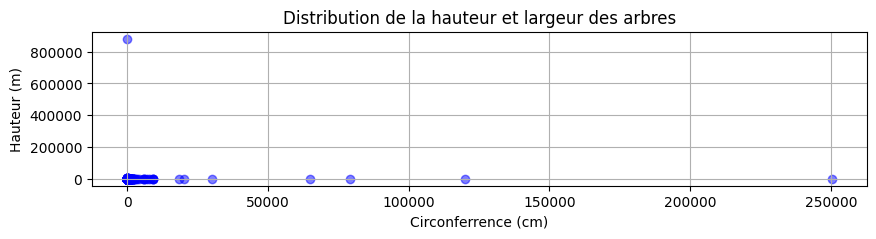

In [ ]:
plt.figure(figsize=(10, 2))  # Ajuster la taille du graphique si nécessaire
plt.scatter(arbres['circonference_cm'], arbres['hauteur_m'], alpha=0.5, color='blue')
plt.title('Distribution de la hauteur et largeur des arbres')
plt.xlabel('Circonferrence (cm)')
plt.ylabel('Hauteur (m)')
plt.grid(True)
plt.show()

En commençant par la hauteur:

À Paris, l'arbre le plus grand mesure environ 30 mètres de hauteur ([source agriculture.gouv.fr](https://agriculture.gouv.fr/lun-des-plus-grands-arbres-de-paris-veille-sur-le-78-rue-de-varenne)).

On remarque qu'on a un max de hauteur beaucoup trop haut. Un Q3 établi à 12 mètres, un écart type de 1971m. Je considère qu'un arbre sur Paris ne devrait pas mesurer plus de 40 metres de haut.

Le minimum est de 0. Logiquement tous les arbres plantés à paris sont déjà haut de quelques centimètres, je ne prendrais pas en compte ça comme valeur aberrante et je préfère le laisser à 0 afin d'être mesuré lors d'un prochain entretien.

Pour toutes les valeurs supérieures à 40m, je remplacerai cette valeur par 0 afin d'être également mesuré lors d'un prochain passage. On ne souhaite pas supprimer ces données car l'arbre existe.


In [ ]:
arbres_trop_grand = arbres[arbres["hauteur_m"] > 40] # Selectionne les valeurs supérieur à 40m
print(f'Il y a {len(arbres_trop_grand)} arbres qui sont indiqué plus haut que 40m.')
arbres.loc[arbres_trop_grand.index,"hauteur_m"] = 0 # Défini la hauteur à 0m
print(f'Il y a maintenant {len(arbres[arbres["hauteur_m"] > 40])} arbres qui sont indiqué plus haut que 40m.')

Il y a 483 arbres qui sont indiqué plus haut que 40m.
Il y a maintenant 0 arbres qui sont indiqué plus haut que 40m.


Pour la circonférence, même principe, on remarque en Q3 115cm, écart type de 673cm et un max qui ne peut pas être aussi élevé.

Suivant Paris, l'arbre qui possède la plus grande circonférence est de 505cm. ([Source paris.fr](https://www.paris.fr/photos/13-arbres-classes-remarquables-25), le sequoia, cliquez sur la dernière image sur le site)

![](https://cdn.paris.fr/paris/2021/01/05/original-90d2e4a1cd4ebc7da31d4a986ca10dfe.jpg)

On considère donc que tout ce qui sera au dessus de 520cm (on laisse un peu de marge à la progression des arbres) sera remplacé par 0 pour être mesuré de nouveau

In [ ]:
arbres_trop_larges = arbres[arbres["circonference_cm"] > 520] # Selectionne les valeurs supérieur à 520cm
print(f'Il y a {len(arbres_trop_larges)} arbres qui sont indiqué plus large que 520cm.')
arbres.loc[arbres_trop_larges.index,"circonference_cm"] = 0 # Défini la largeur arbres à 0cm
print(f'Il y a maintenant {len(arbres[arbres["circonference_cm"] > 520])} arbres qui sont indiqué plus large que 520cm.')

Il y a 126 arbres qui sont indiqué plus large que 520cm.
Il y a maintenant 0 arbres qui sont indiqué plus large que 520cm.


Vérification à nouveau

In [ ]:
arbres[["circonference_cm", "hauteur_m"]].describe()

circonference_cm      hauteur_m
count     200137.000000  200137.000000
mean          79.460465       8.306125
std           62.472101       6.190824
min            0.000000       0.000000
25%           30.000000       5.000000
50%           70.000000       8.000000
75%          115.000000      12.000000
max          520.000000      40.000000

On remarque que les données semblent correctes.

On affiche de nouveau un graphique de dispersion représentant la distribution de la hauteur et largeur des arbres après nettoyage.

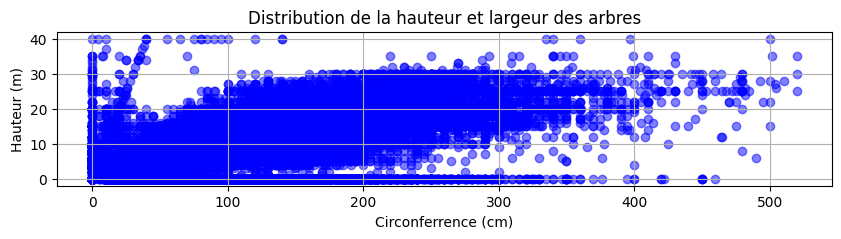

In [ ]:
plt.figure(figsize=(10, 2))  # Ajuster la taille du graphique si nécessaire
plt.scatter(arbres['circonference_cm'], arbres['hauteur_m'], alpha=0.5, color='blue')
plt.title('Distribution de la hauteur et largeur des arbres')
plt.xlabel('Circonferrence (cm)')
plt.ylabel('Hauteur (m)')
plt.grid(True)
plt.show()

Les données sont nettoyé, on peut maintenant créer un résultat avec confiance

## Étape 3 > Résultat

### Graphique

On affiche les arbres à Paris via coordonnées GPS avec matplotlib pour visualiser la répartition des arbres à Paris.

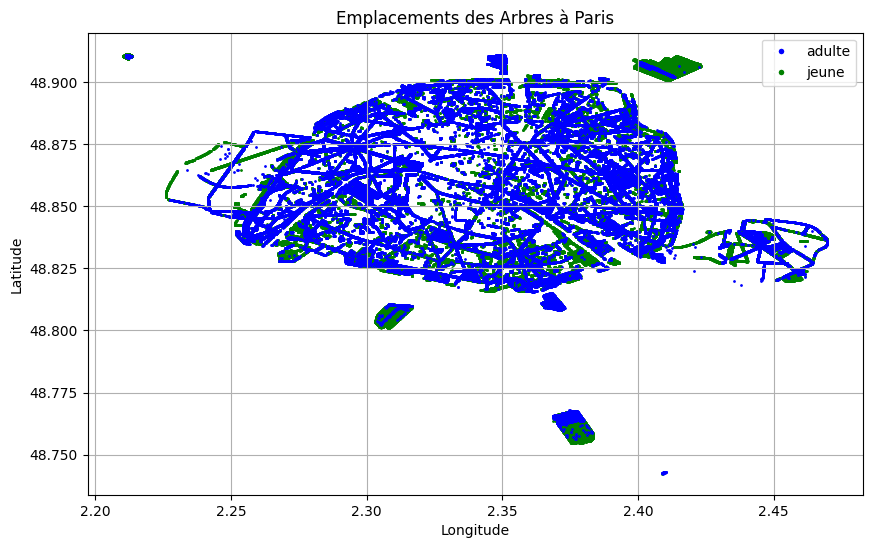

In [ ]:
# Extrais les latitudes, longitudes et la colonne stade_developpement
latitudes = arbres['geo_point_2d_a']
longitudes = arbres['geo_point_2d_b']
etapes = arbres['stade_developpement']

# Défini des couleurs personnalisées pour chaque étape
couleurs_etapes = {'A': 'blue', 'J': 'green'}

# Remplace les valeurs de stade_developpement par les étiquettes personnalisées
etiquettes_etapes = {'A': 'adulte', 'J': 'jeune'}

# Créer un graphique de dispersion avec des couleurs personnalisées et étiquettes
plt.figure(figsize=(10, 6))
for etape in set(etapes):
    arbres_etape = arbres[arbres['stade_developpement'] == etape]
    plt.scatter(arbres_etape['geo_point_2d_b'], arbres_etape['geo_point_2d_a'], s=1, label=etape, color=couleurs_etapes.get(etape, 'black'))

plt.title('Emplacements des Arbres à Paris')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Créer une légende personnalisée
legende_personnalisee = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=couleur, markersize=5, label=etiquettes_etapes.get(etiquette, etiquette)) for etiquette, couleur in couleurs_etapes.items()]
plt.legend(handles=legende_personnalisee)

plt.grid(True)
plt.show()

On affiche maintenant la localisation des arbres remarquable à Paris via coordonnées GPS avec la librairie folium

In [ ]:
# Focus sur la map de Paris
paris_map = folium.Map(location=[48.8566, 2.3522], zoom_start=13)

# Prends les arbres remarquable
abres_remarquables = arbres[arbres["remarquable"] == 1.0]

# Extrais les latitudes et longitudes
latitudes = abres_remarquables['geo_point_2d_a']
longitudes = abres_remarquables['geo_point_2d_b']

# Ajoute des marqueurs individuels sur la carte
for lat, lon in zip(latitudes, longitudes):
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(paris_map)

# Affiche la carte
display(paris_map)


On affiche une carte de chaleur des arbres à Paris via coordonnées GPS avec folium. Vert l'arbre est jeune, bleu l'arbre est adulte. Afin de voir la répartition différemment.

In [ ]:
# Focus sur la map de Paris avec OpenStreetMap
m = folium.Map(location=[48.8566, 2.3522], zoom_start=12, tiles='OpenStreetMap')

heat_data = []

# Ajoute une donnée de la heatmap en fonction du stade de développement
for _, row in arbres.iterrows():
    lat = float(row['geo_point_2d_a'])
    lon = float(row['geo_point_2d_b'])
    color = 0.2 if row['stade_developpement'] == 'A' else 0.8
    heat_data.append([lat, lon, color])

# Créer la heatmap
HeatMap(heat_data, radius=10, blur=10, gradient={0.2: 'blue', 0.6: 'cyan', 1: 'green'}).add_to(m)

# Ajoute la légende à la carte
legend_html = '''
    <div style="position: fixed; bottom: 50px; left: 50px; width: 200px; height: 90px;
                background-color: rgba(255, 255, 255, 0.8); z-index: 1000;
                border-radius: 5px; border: 1px solid #ccc; padding: 10px;">
        <div style="text-align: center; font-weight: bold;">Stade de développement</div>
        <div><span style="background-color: blue; width: 20px; height: 20px; display: inline-block;"></span> Adulte</div>
        <div><span style="background-color: green; width: 20px; height: 20px; display: inline-block;"></span> Jeune</div>
    </div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

display(m)

On affiche le nombre d'arbres jeunes et adultes par arrondissement dans un diagramme en barres horizontal.

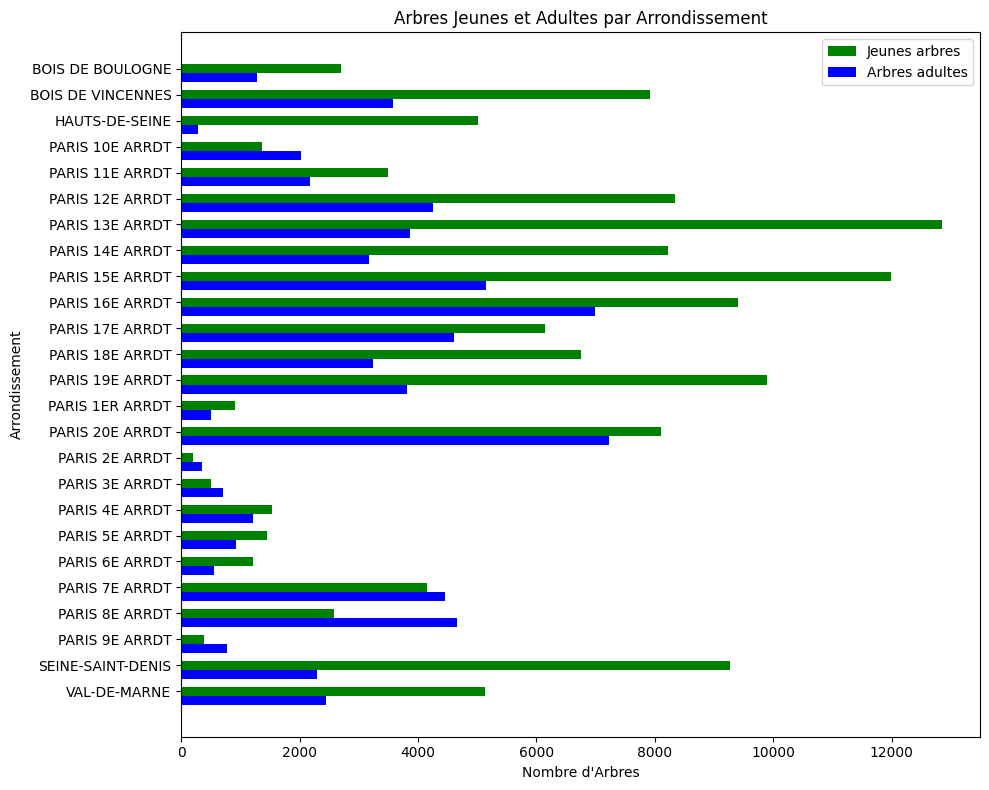

In [ ]:
# Regroupe les données par arrondissement et stade_developpement, et calculer les décomptes
donnees_groupees = arbres.groupby(['arrondissement', 'stade_developpement']).size().unstack().fillna(0)

# Calcule le nombre total d'arbres (jeunes + adultes) dans chaque arrondissement
donnees_groupees['total'] = donnees_groupees['J'] + donnees_groupees['A']

# Trace un diagramme en barres horizontales montrant les arbres jeunes et adultes par arrondissement
fig, ax = plt.subplots(figsize=(10, 8))

arrondissements = donnees_groupees.index
arbres_jeunes = donnees_groupees['J']
arbres_adultes = donnees_groupees['A']

# Améliore le rendu
largeur_barre = 0.35
positions_barre = range(len(arrondissements))

# Défini les données dans la graphiqjue
ax.barh(positions_barre, arbres_jeunes, largeur_barre, label='Jeunes arbres', color='green')
ax.barh([p + largeur_barre for p in positions_barre], arbres_adultes, largeur_barre, label='Arbres adultes', color='blue')

# Définition de la légende et labels
ax.set_yticks(positions_barre)
ax.set_yticklabels(arrondissements)
ax.invert_yaxis()  # Inverser l'axe y pour placer les arrondissements en haut

ax.set_xlabel('Nombre d\'Arbres')
ax.set_ylabel('Arrondissement')
ax.set_title('Arbres Jeunes et Adultes par Arrondissement')
ax.legend()

plt.tight_layout()
plt.show()

On affiche les différents arbres à vérifier en fonction des critères de la ville de Paris.

In [ ]:
print(f'- Arbre à vérifier chaque année = {len(arbres)}') # Affiche le nombre d'arbres jeunes
print(f'- Arbre à s\'occuper tous les 15 jours = {len(arbres[arbres["stade_developpement"] == "J"])}') # Affiche le nombre d'arbres jeunes
print(f'- Arbres à s\'occuper tous les 7-9 ans = {len(arbres[arbres["stade_developpement"] == "A"])}') # Affiche le nombre d'arbres adultes
print(f'- Arbre à effectuer un relevé chaque année = {round(len(arbres) * 0.2)}') # Affiche le nombre d'arbres jeunes
print(f'- Arbre à retirer chaque année = {(round(len(arbres) * 0.015))}') # Affiche le nombre d'arbres jeunes
print(f'- Arbres remarquable à entretenir chaque printemps = {len(arbres[arbres["remarquable"] == 1])}') # Affiche le nombre d'arbres remarquables

print(f'\n- Arbres à mettre à jour suite à des données aberrante = {len(arbres[(arbres["hauteur_m"] == 0) | (arbres["circonference_cm"] == 0)])}')


- Arbre à vérifier chaque année = 200137
- Arbre à s'occuper tous les 15 jours = 129586
- Arbres à s'occuper tous les 7-9 ans = 70551
- Arbre à effectuer un relevé chaque année = 40027
- Arbre à retirer chaque année = 3002
- Arbres remarquable à entretenir chaque printemps = 184

- Arbres à mettre à jour suite à des données aberrante = 40180


### Optimisation base

Afin d'obtenir une optimisation sur donnée existante, je me base d'un [exemple réel](https://cdn.paris.fr/paris/2023/08/11/programme-travaux-arbres-mis-a-jour-le-11-aout-2023-ZxxL.pdf) de Paris en Août sur l'entretien des arbres, il y a 105 travaux programmés de type entretiens.

Je prends en compte ces données pour établir l'optimisation possible d'un gain de temps et réduction du nombre de travaux.

In [ ]:
# J'ai transformé le pdf en csv sur les types "entretiens" uniquement
paris_travaux = pd.read_csv('https://raw.githubusercontent.com/6be709c0/oc-ai-engineer/main/P2/input/paris-travaux.csv', sep = ';',)
paris_travaux.head()

arrondissement                   date
0  PARIS 1ER ARRDT  du 14 au 25 août 2023
1   PARIS 4E ARRDT  du 14 au 25 août 2023
2   PARIS 4E ARRDT  du 14 au 25 août 2023
3   PARIS 7E ARRDT  du 14 au 25 août 2023
4   PARIS 7E ARRDT  du 14 au 25 août 2023

Je calcul le nombre de jour travaillé de chaque date en retirant les weekends.

In [ ]:
# Ajout de la colonnes "Jours travaillé"
paris_travaux.loc[paris_travaux["date"] == "du 14 au 25 août 2023", "jours_travaille"] = 10
paris_travaux.loc[paris_travaux["date"] == "du 9 au 25 août 2023", "jours_travaille"] = 13
paris_travaux.head()

arrondissement                   date  jours_travaille
0  PARIS 1ER ARRDT  du 14 au 25 août 2023             10.0
1   PARIS 4E ARRDT  du 14 au 25 août 2023             10.0
2   PARIS 4E ARRDT  du 14 au 25 août 2023             10.0
3   PARIS 7E ARRDT  du 14 au 25 août 2023             10.0
4   PARIS 7E ARRDT  du 14 au 25 août 2023             10.0

Je regarde le nombre de travaux effectués par arrondissement

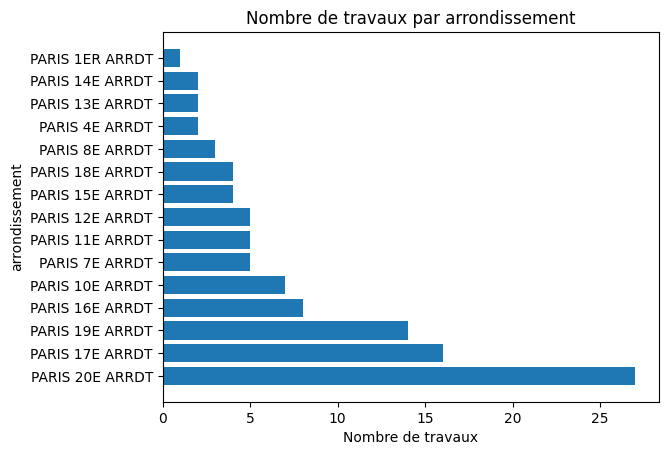

In [ ]:
###### Pour l'arrondissement ######
type_valeurs = paris_travaux['arrondissement'].value_counts().reset_index() # Calculer le décompte des valeurs dans la colonne 'domanialite' et réinitialiser l'index
type_valeurs.columns = ['arrondissement', 'nombre'] # Renommer les colonnes du DataFrame

# Créer un diagramme à barres avec les valeurs de 'domanialite' en tant que valeurs sur l'axe x
# et les valeurs de 'nombre' en tant que hauteurs des barres
plt.barh(type_valeurs['arrondissement'], type_valeurs['nombre'])

plt.ylabel('arrondissement') # Ajouter un text à l'axe des abscisses (axe x)
plt.xlabel('Nombre de travaux') # Ajouter un text à l'axe des ordonnées (axe y)
plt.title('Nombre de travaux par arrondissement') # Ajouter un titre au graphique

plt.show() # Afficher le graphique

Calcul du nombre de travaux, nombre d'arbres, nombre d'arbres en moyenne par jour par travaux pour comprendre ce qui peut être optimisé.

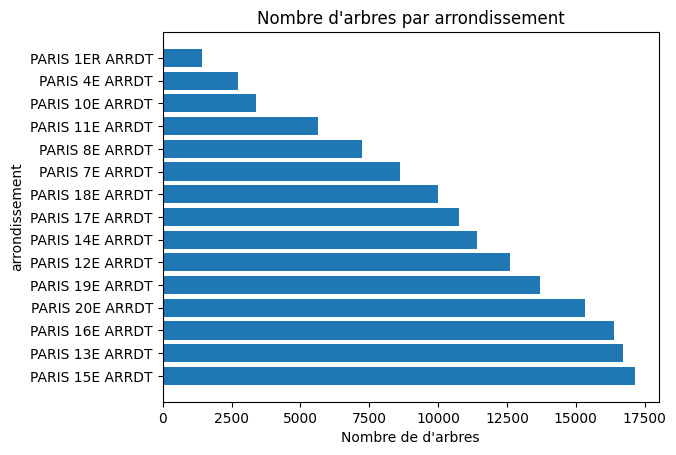

arrondissement  nombre d'arbres  jours_travaille  nb_travaux  \
0   PARIS 1ER ARRDT             1413               10           1   
1    PARIS 4E ARRDT             2740               20           2   
2    PARIS 7E ARRDT             8617               50           5   
3    PARIS 8E ARRDT             7245               39           3   
4   PARIS 10E ARRDT             3385               91           7   
5   PARIS 11E ARRDT             5658               50           5   
6   PARIS 12E ARRDT            12600               50           5   
7   PARIS 13E ARRDT            16712               20           2   
8   PARIS 14E ARRDT            11399               20           2   
9   PARIS 15E ARRDT            17151               40           4   
10  PARIS 16E ARRDT            16403              104           8   
11  PARIS 17E ARRDT            10762              208          16   
12  PARIS 18E ARRDT            10011               52           4   
13  PARIS 19E ARRDT            13709              140          14   
14  PARIS 20E ARRDT            15340              270          27   

    jour_travaille_par_equipe  moyenne_arbre_par_jour  
0                        10.0                   141.0  
1                        10.0                   137.0  
2                        10.0                   172.0  
3                        13.0                   186.0  
4                        13.0                    37.0  
5                        10.0                   113.0  
6                        10.0                   252.0  
7                        10.0                   836.0  
8                        10.0                   570.0  
9                        10.0                   429.0  
10                       13.0                   158.0  
11                       13.0                    52.0  
12                       13.0                   193.0  
13                       10.0                    98.0  
14                       10.0                    57.0

In [ ]:
# Calculer le nombre de lignes par arrondissement dans la table arbres
arbres_count = arbres['arrondissement'].value_counts().reset_index()
arbres_count.columns = ['arrondissement', 'nombre d\'arbres']

# Créer un tableau distinct de valeurs d'arrondissement à partir de la table paris_travaux
arrondissements_distincts = paris_travaux['arrondissement'].unique()

# Créer un DataFrame avec les valeurs d'arrondissement distinctes
paris_travaux_update = pd.DataFrame({'arrondissement': arrondissements_distincts})

# Fusionner paris_travaux_update avec arbres_count en utilisant la colonne 'arrondissement'
paris_travaux_update = paris_travaux_update.merge(arbres_count, on='arrondissement', how='left')

# Calculer la somme de jours_travaille par arrondissement dans la table paris_travaux
jours_travailles_sum = paris_travaux.groupby('arrondissement')['jours_travaille'].sum().reset_index()

# Fusionner jours_travailles_sum avec paris_travaux_update en utilisant la colonne 'arrondissement'
paris_travaux_update = paris_travaux_update.merge(jours_travailles_sum, on='arrondissement', how='left')

# Remplir les valeurs manquantes dans la colonne 'jours_travaille' avec 0
paris_travaux_update['jours_travaille'] = paris_travaux_update['jours_travaille'].fillna(0).astype(int)

# Calculer le nombre de travaux (nombre de lignes) par arrondissement dans la table paris_travaux
nb_travaux_count = paris_travaux['arrondissement'].value_counts().reset_index()
nb_travaux_count.columns = ['arrondissement', 'nb_travaux']

# Fusionner nb_travaux_count avec paris_travaux_update en utilisant la colonne 'arrondissement'
paris_travaux_update = paris_travaux_update.merge(nb_travaux_count, on='arrondissement', how='left')
paris_travaux_update['jour_travaille_par_equipe'] = round(paris_travaux_update['jours_travaille'] / paris_travaux_update['nb_travaux'], 0)

paris_travaux_update['moyenne_arbre_par_jour'] = round(paris_travaux_update['nombre d\'arbres'] / paris_travaux_update['jours_travaille'], 0)

###### Pour l'arbres par arrondissement ######

# Créer un diagramme à barres avec les valeurs de 'domanialite' en tant que valeurs sur l'axe x
# et les valeurs de 'nombre' en tant que hauteurs des barres
paris_travaux_update_tri = paris_travaux_update.sort_values(by='nombre d\'arbres', ascending=False)

plt.barh(paris_travaux_update_tri["arrondissement"], paris_travaux_update_tri["nombre d'arbres"])

plt.ylabel('arrondissement') # Ajouter un text à l'axe des abscisses (axe x)
plt.xlabel('Nombre de d\'arbres') # Ajouter un text à l'axe des ordonnées (axe y)
plt.title('Nombre d\'arbres par arrondissement') # Ajouter un titre au graphique

plt.show() # Afficher le graphique

# Afficher le DataFrame avec les nouvelles colonnes
paris_travaux_update

In [ ]:
print(f'Nombre total de travaux: {paris_travaux_update["nb_travaux"].sum()}')
print(f'Nombre total de jour travaillé: {paris_travaux_update["jours_travaille"].sum()} en l\'espace de 13 jours')

somme_arbre = paris_travaux_update["nombre d'arbres"].sum()
print(f'Arbre entretenu en Août: {somme_arbre}')
paris_travaux_update[["moyenne_arbre_par_jour"]].describe()


Nombre total de travaux: 105
Nombre total de jour travaillé: 1164 en l'espace de 13 jours
Arbre entretenu en Août: 153145


moyenne_arbre_par_jour
count               15.000000
mean               228.733333
std                220.599011
min                 37.000000
25%                105.500000
50%                158.000000
75%                222.500000
max                836.000000

En prenant la moyenne on observe 228 arbres entretenus par jour.

En observant le Q2 on voit environ 158 arbres entretenus par jour.

En se basant uniquement sur ces données, on peut dire que chaque équipe peut entretenir environ 150 arbres par jour. (Le seul critère prit en compte pour optimiser les entretiens)

À partir de là, on peut créer notre résultat.

### Optimisation résultat

Je veux savoir quel arrondissement je peux optimiser en me basant sur une moyenne de 150 arbres par jour.

In [ ]:
arbre_entretenu_moyenne = 150

# On peut optimiser si on a en moyenne moins de 150 arbres - 150/10 jours, sinon on optimisera aucune journée
opt_arrdt_avant = paris_travaux_update[paris_travaux_update["moyenne_arbre_par_jour"] < arbre_entretenu_moyenne - round(150 / 10)]

print(f"On observe qu'on peut optimiser {len(opt_arrdt_avant)} arrondissements")
opt_arrdt_avant

On observe qu'on peut optimiser 5 arrondissements


arrondissement  nombre d'arbres  jours_travaille  nb_travaux  \
4   PARIS 10E ARRDT             3385               91           7   
5   PARIS 11E ARRDT             5658               50           5   
11  PARIS 17E ARRDT            10762              208          16   
13  PARIS 19E ARRDT            13709              140          14   
14  PARIS 20E ARRDT            15340              270          27   

    jour_travaille_par_equipe  moyenne_arbre_par_jour  
4                        13.0                    37.0  
5                        10.0                   113.0  
11                       13.0                    52.0  
13                       10.0                    98.0  
14                       10.0                    57.0

On implémente alors la moyenne de 150 arbres par jour max

In [ ]:
# Copie le tableau pour le modifier
opt_arrdt_apres = opt_arrdt_avant.copy()

# Calcul les jours travaille, nb travaux et moyenne d'arbres
opt_arrdt_apres["jours_travaille"] = (opt_arrdt_apres["nombre d'arbres"] / arbre_entretenu_moyenne).round()
opt_arrdt_apres["nb_travaux"] = (opt_arrdt_apres["jours_travaille"] / opt_arrdt_apres["jour_travaille_par_equipe"]).apply(math.ceil)
opt_arrdt_apres['moyenne_arbre_par_jour'] = round(opt_arrdt_apres['nombre d\'arbres'] / opt_arrdt_apres['jours_travaille'])

opt_arrdt_apres # Affiche le résultat



arrondissement  nombre d'arbres  jours_travaille  nb_travaux  \
4   PARIS 10E ARRDT             3385             23.0           2   
5   PARIS 11E ARRDT             5658             38.0           4   
11  PARIS 17E ARRDT            10762             72.0           6   
13  PARIS 19E ARRDT            13709             91.0          10   
14  PARIS 20E ARRDT            15340            102.0          11   

    jour_travaille_par_equipe  moyenne_arbre_par_jour  
4                        13.0                   147.0  
5                        10.0                   149.0  
11                       13.0                   149.0  
13                       10.0                   151.0  
14                       10.0                   150.0

On en déduit alors l'optimisation possible

In [ ]:
# Calcul le gain en jour
nombre_jours_travaille_avant = opt_arrdt_avant["jours_travaille"].sum()
nombre_jours_travaille_apres = opt_arrdt_apres["jours_travaille"].sum()
gain_en_jour = nombre_jours_travaille_avant - nombre_jours_travaille_apres

optimisation_jour = round(gain_en_jour/nombre_jours_travaille_avant * 100)

# print(f"Nombre de jour travaillé total avant = {nombre_jours_travaille_avant}")
# print(f"Nombre de jour travaillé total après = {nombre_jours_travaille_apres}")

print("\nResultat:\n")
print(f"Le nombre de jours de travaux initial de {nombre_jours_travaille_avant} peut être optimisé à {nombre_jours_travaille_apres} (réduction de {gain_en_jour} soit {optimisation_jour}% d'optimisation)")

# Calcul le gain en nombre de travaux
nombre_travaux_avant = opt_arrdt_avant["nb_travaux"].sum()
nombre_travaux_apres = opt_arrdt_apres["nb_travaux"].sum()
reduction_travaux = nombre_travaux_avant - nombre_travaux_apres
optimisation_travaux = round(reduction_travaux/nombre_travaux_avant * 100)
# Affiche le résultat
print(f"Le nombre de travaux initial de {nombre_travaux_avant} peut être optimisé à {nombre_travaux_apres} (réduction de {reduction_travaux} soit {optimisation_travaux}% d'optimisation)")


Resultat:

Le nombre de jours de travaux initial de 759 peut être optimisé à 326.0 (réduction de 433.0 soit 57% d'optimisation)
Le nombre de travaux initial de 69 peut être optimisé à 33 (réduction de 36 soit 52% d'optimisation)
